# Extra code

In [1]:
import pandas as pd
import os
from pathlib import Path
import Data
import coordinates

In [2]:
currpath = os.getcwd()
mypath = Path().absolute().parent # each '.parent' goes one level up - vary as required
#print(mypath)
#os.chdir(mypath)
os.chdir(os.path.dirname(os.path.abspath("meuse_data.csv")))
print(Path().absolute())

C:\Users\chloe\OneDrive\AY2024 FYP\FYP-Code\FYP-Spatial-Analytics


## Data Package Introduction

The meuse data set provided by package sp is a data set comprising of four heavy metals measured in the top soil in a flood plain along the river Meuse, along with a handful of covariates.

In [3]:
meuse_df = pd.read_csv("Data/meuse_data.csv")
meuse_df.describe()

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,dist.m
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,153.000000,155.000000,155.000000,155.000000,155.000000
mean,180004.600000,331634.935484,3.245806,40.316129,153.361290,469.716129,8.165394,0.240017,7.478431,1.606452,1.451613,0.283871,290.322581
std,746.039775,1047.746801,3.523746,23.680436,111.320054,367.073788,1.058657,0.197702,3.432966,0.734111,0.636483,0.452336,226.799927
min,178605.000000,329714.000000,0.200000,14.000000,37.000000,113.000000,5.180000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000
25%,179371.000000,330762.000000,0.800000,23.000000,72.500000,198.000000,7.546000,0.075687,5.300000,1.000000,1.000000,0.000000,80.000000
50%,179991.000000,331633.000000,2.100000,31.000000,123.000000,326.000000,8.180000,0.211843,6.900000,1.000000,1.000000,0.000000,270.000000
75%,180629.500000,332463.000000,3.850000,49.500000,207.000000,674.500000,8.955000,0.364067,9.000000,2.000000,2.000000,1.000000,450.000000
max,181390.000000,333611.000000,18.100000,128.000000,654.000000,1839.000000,10.520000,0.880389,17.000000,3.000000,3.000000,1.000000,1000.000000


## To replace missing values with mode

In [5]:
Data['om']=Data['om'].fillna(Data['om'].mode()[0])
Data['landuse']=Data['landuse'].fillna(Data['landuse'].mode()[0])
missing_values=Data.isnull().sum()
print(missing_values)

x          0
y          0
cadmium    0
copper     0
lead       0
zinc       0
elev       0
dist       0
om         0
ffreq      0
soil       0
lime       0
landuse    0
dist.m     0
dtype: int64


In [7]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import shapely
import seaborn as sns

## Finding and replacing outliers with median value

In [8]:
def show_outlier(dt, var):
    var_name = dt[var]

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.boxplot(x=var_name)
    plt.title('With outliers')

    plt.subplot(2, 2, 2)
    sns.histplot(x=var_name, kde=True)
    plt.title('With outliers')

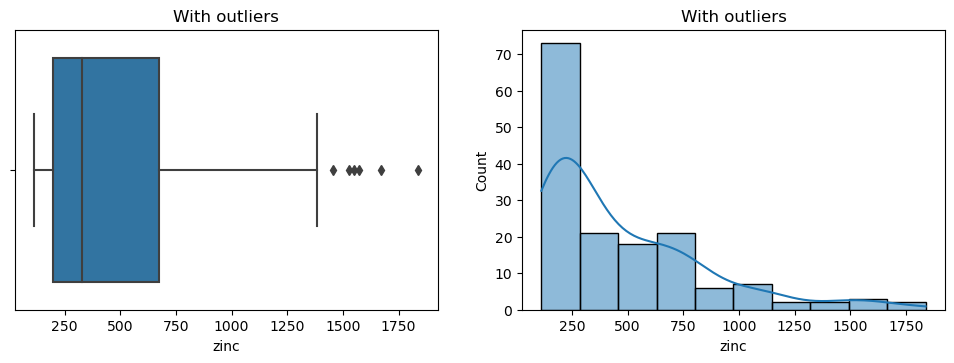

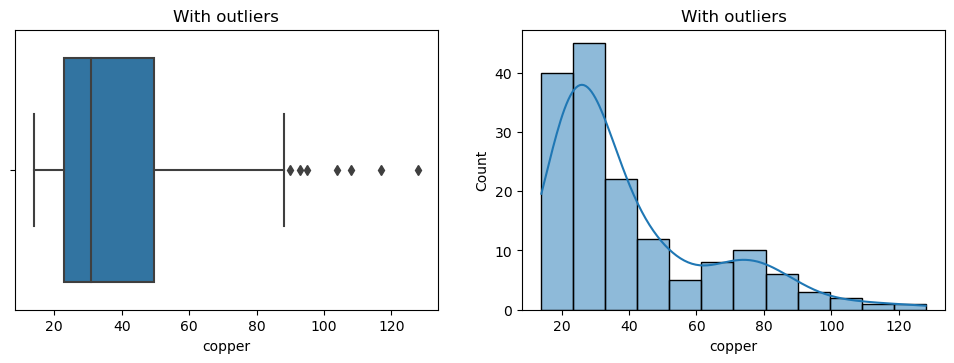

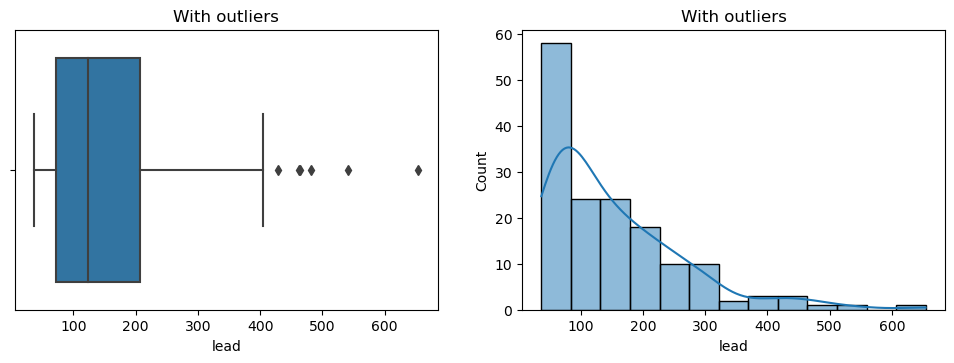

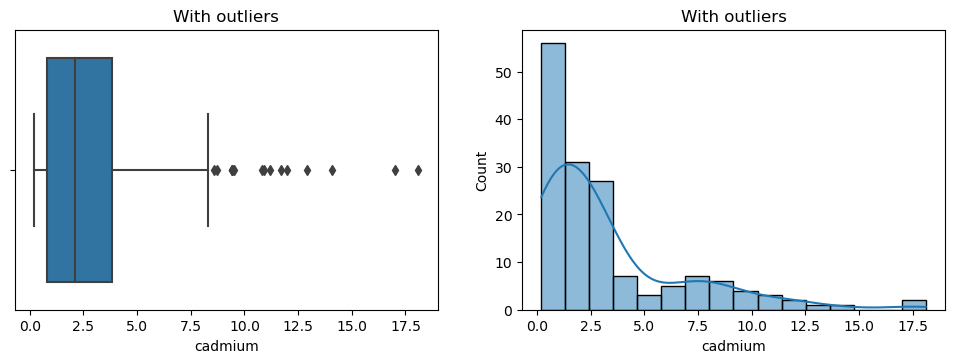

In [9]:
Data = meuse_df.copy()
show_outlier(Data,'zinc')
show_outlier(Data,'copper')
show_outlier(Data,'lead')
show_outlier(Data,'cadmium')

In [11]:
Data['zinc'].describe()

count     155.000000
mean      469.716129
std       367.073788
min       113.000000
25%       198.000000
50%       326.000000
75%       674.500000
max      1839.000000
Name: zinc, dtype: float64

In [12]:
Data['copper'].describe()

count    155.000000
mean      40.316129
std       23.680436
min       14.000000
25%       23.000000
50%       31.000000
75%       49.500000
max      128.000000
Name: copper, dtype: float64

### Cleaning by replacement

In [34]:
def remove_outlier(dt,var):
    # Create the dataframe
    cleaned_dt = dt.copy()
    print("Old Shape: ", dt.shape)

    ''' Detection '''
    # IQR
    # Calculate the upper and lower limits
    Q1 = dt[var].quantile(0.25)
    Q3 = dt[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    median_value = dt[var].median()
    #mode_value = dt[var].mode() Not sure if should replace with median or mode 

    outlier_indices = np.where((dt[var] < lower_limit) | (dt[var] > upper_limit))[0]
    print("Number of outliers:", len(outlier_indices))
    
    cleaned_dt.loc[outlier_indices, var] = median_value

    # Print the new shape of the DataFrame
    print("New Shape: ", cleaned_dt.shape)
    
    for idx in outlier_indices:
        print(f"Row {idx}: Original Value = {dt.at[idx, var]}, Replaced with Median = {cleaned_dt.at[idx, var]}")
    
    print("Skewness before cleaning:", dt[var].skew())
    print("Skewness after cleaning:", cleaned_dt[var].skew())
    
    return cleaned_dt

### Cleaning by removing completely 

In [9]:
def remove_outlier(dt, var):
    # Create the dataframe
    cleaned_dt = dt.copy()
    print("Old Shape: ", dt.shape)

    ''' Detection '''
    # IQR
    # Calculate the upper and lower limits
    Q1 = dt[var].quantile(0.25)
    Q3 = dt[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_indices = np.where((dt[var] < lower_limit) | (dt[var] > upper_limit))[0]
    print("Number of outliers:", len(outlier_indices))

    # Remove outliers completely
    cleaned_dt = cleaned_dt.drop(index=outlier_indices).reset_index(drop=True)

    # Print the new shape of the DataFrame
    print("New Shape: ", cleaned_dt.shape)

    print("Skewness before cleaning:", dt[var].skew())
    print("Skewness after cleaning:", cleaned_dt[var].skew())

    return cleaned_dt

In [10]:
print("---Cleaning Cadmium---")
cleaned = remove_outlier(Data,'cadmium')

---Cleaning Cadmium---
Old Shape:  (155, 14)
Number of outliers: 15
New Shape:  (140, 14)
Skewness before cleaning: 1.796224721237889
Skewness after cleaning: 1.3172285372033492


In [11]:
print("---Cleaning Copper---")
cleaned1 = remove_outlier(cleaned,'copper')

---Cleaning Copper---
Old Shape:  (140, 14)
Number of outliers: 15
New Shape:  (125, 14)
Skewness before cleaning: 1.3131157738354833
Skewness after cleaning: 1.0899736674310447


In [12]:
print("---Cleaning Zinc---")
cleaned2 = remove_outlier(cleaned1,'zinc')

---Cleaning Zinc---
Old Shape:  (125, 14)
Number of outliers: 0
New Shape:  (125, 14)
Skewness before cleaning: 0.9875610432534779
Skewness after cleaning: 0.9875610432534779


In [13]:
print("---Cleaning Lead---")
meuse_cleaned = remove_outlier(cleaned2,'lead')

---Cleaning Lead---
Old Shape:  (125, 14)
Number of outliers: 2
New Shape:  (123, 14)
Skewness before cleaning: 1.034973206135582
Skewness after cleaning: 0.9706833151722769


## Plottig Spatial distributions of each metal

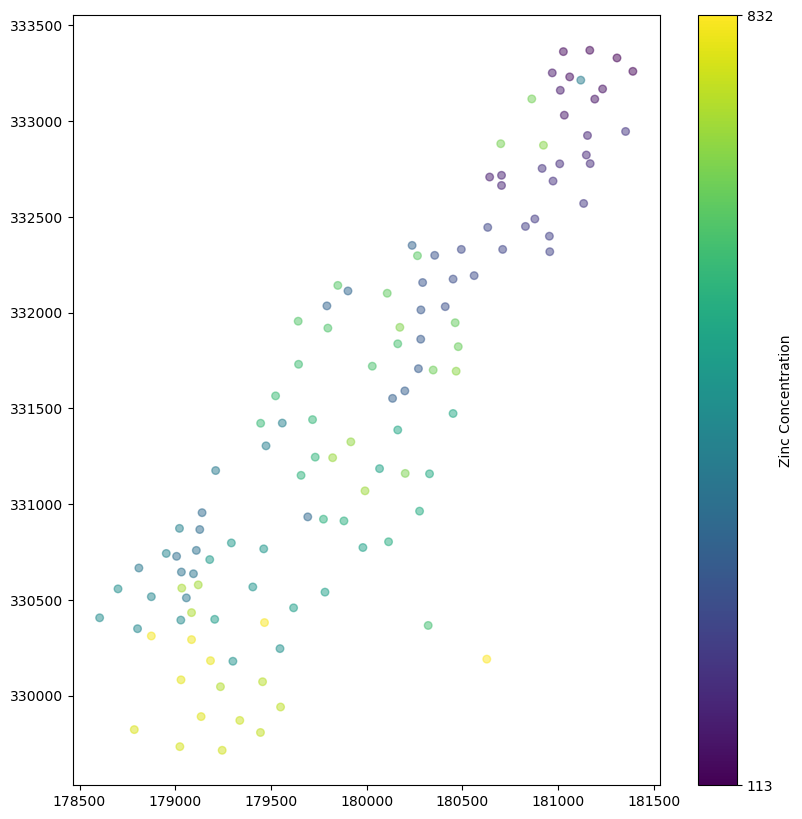

In [15]:
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as colors

zinc_values = meuse_cleaned['zinc']

# Create a GeoDataFrame from the 'meuse' DataFrame
geometry = [Point(xy) for xy in zip(meuse_cleaned['x'], meuse_cleaned['y'])]
geo_df = gpd.GeoDataFrame(meuse_cleaned, geometry=geometry)

# Plot the spatial distribution of zinc concentrations with colors based on zinc values
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = geo_df.plot(ax=ax, marker='o', c=zinc_values, cmap='viridis', markersize=30, alpha=0.5, legend=True)

# Create a ScalarMappable to map zinc values to colors
norm = colors.Normalize(vmin=zinc_values.min(), vmax=zinc_values.max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add colorbar for zinc concentrations using ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Zinc Concentration')

# Set ticks on the colorbar
cbar.set_ticks([zinc_values.min(), zinc_values.max()])

# Display the plot
plt.show()


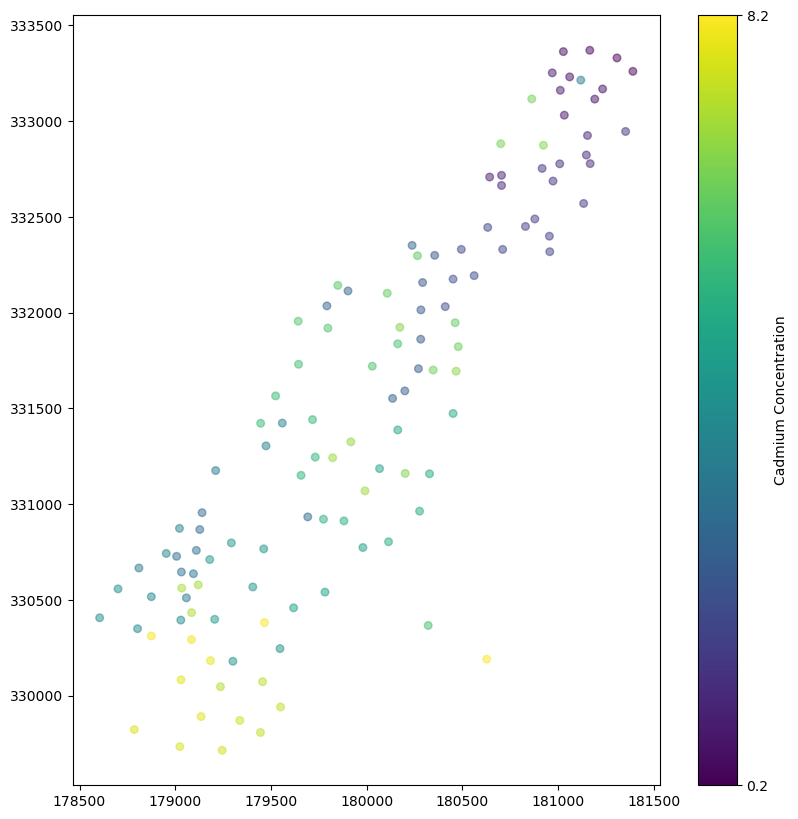

In [16]:
cadmium_values = meuse_cleaned['cadmium']

# Create a GeoDataFrame from the 'meuse' DataFrame
geometry = [Point(xy) for xy in zip(meuse_cleaned['x'], meuse_cleaned['y'])]
geo_df = gpd.GeoDataFrame(meuse_cleaned, geometry=geometry)

# Plot the spatial distribution of cadmium concentrations with colors based on cadmium values
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = geo_df.plot(ax=ax, marker='o', c=cadmium_values, cmap='viridis', markersize=30, alpha=0.5, legend=True)

# Create a ScalarMappable to map cadmium values to colors
norm = colors.Normalize(vmin=cadmium_values.min(), vmax=cadmium_values.max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add colorbar for cadmium concentrations using ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Cadmium Concentration')

# Set ticks on the colorbar
cbar.set_ticks([cadmium_values.min(), cadmium_values.max()])

# Display the plot
plt.show()


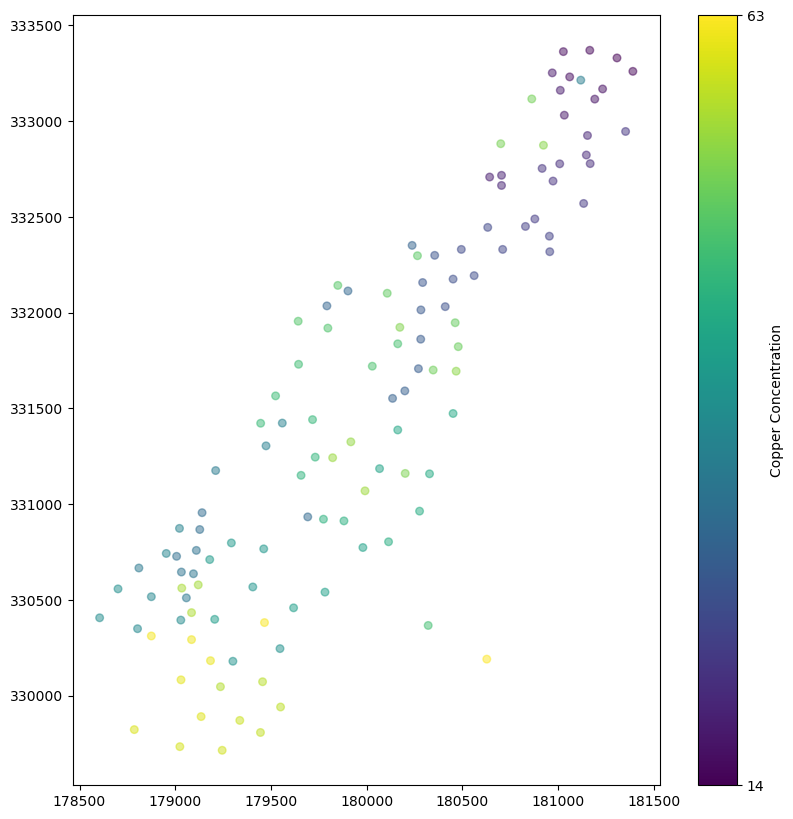

In [17]:
copper_values = meuse_cleaned['copper']

# Create a GeoDataFrame from the 'meuse' DataFrame
geometry = [Point(xy) for xy in zip(meuse_cleaned['x'], meuse_cleaned['y'])]
geo_df = gpd.GeoDataFrame(meuse_cleaned, geometry=geometry)

# Plot the spatial distribution of copper concentrations with colors based on copper values
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = geo_df.plot(ax=ax, marker='o', c=copper_values, cmap='viridis', markersize=30, alpha=0.5, legend=True)

# Create a ScalarMappable to map copper values to colors
norm = colors.Normalize(vmin=copper_values.min(), vmax=copper_values.max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add colorbar for copper concentrations using ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Copper Concentration')

# Set ticks on the colorbar
cbar.set_ticks([copper_values.min(), copper_values.max()])

# Display the plot
plt.show()


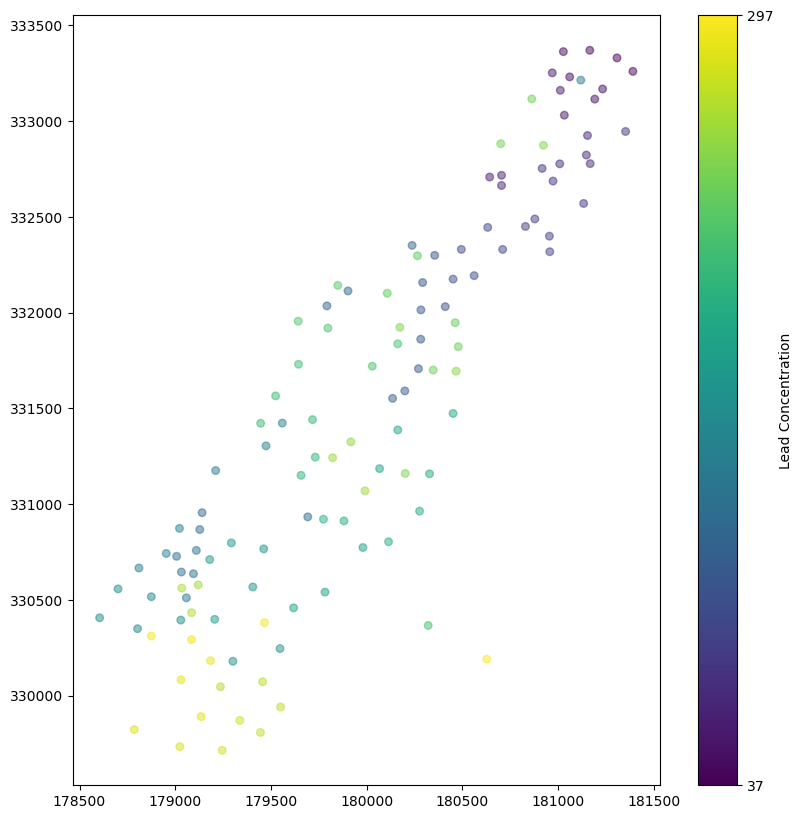

In [18]:
lead_values = meuse_cleaned['lead']

# Create a GeoDataFrame from the 'meuse' DataFrame
geometry = [Point(xy) for xy in zip(meuse_cleaned['x'], meuse_cleaned['y'])]
geo_df = gpd.GeoDataFrame(meuse_cleaned, geometry=geometry)

# Plot the spatial distribution of lead concentrations with colors based on lead values
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = geo_df.plot(ax=ax, marker='o', c=lead_values, cmap='viridis', markersize=30, alpha=0.5, legend=True)

# Create a ScalarMappable to map lead values to colors
norm = colors.Normalize(vmin=lead_values.min(), vmax=lead_values.max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add colorbar for lead concentrations using ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Lead Concentration')

# Set ticks on the colorbar
cbar.set_ticks([lead_values.min(), lead_values.max()])

# Display the plot
plt.show()


## Relationship between the different metals

### Using cleaned dataset

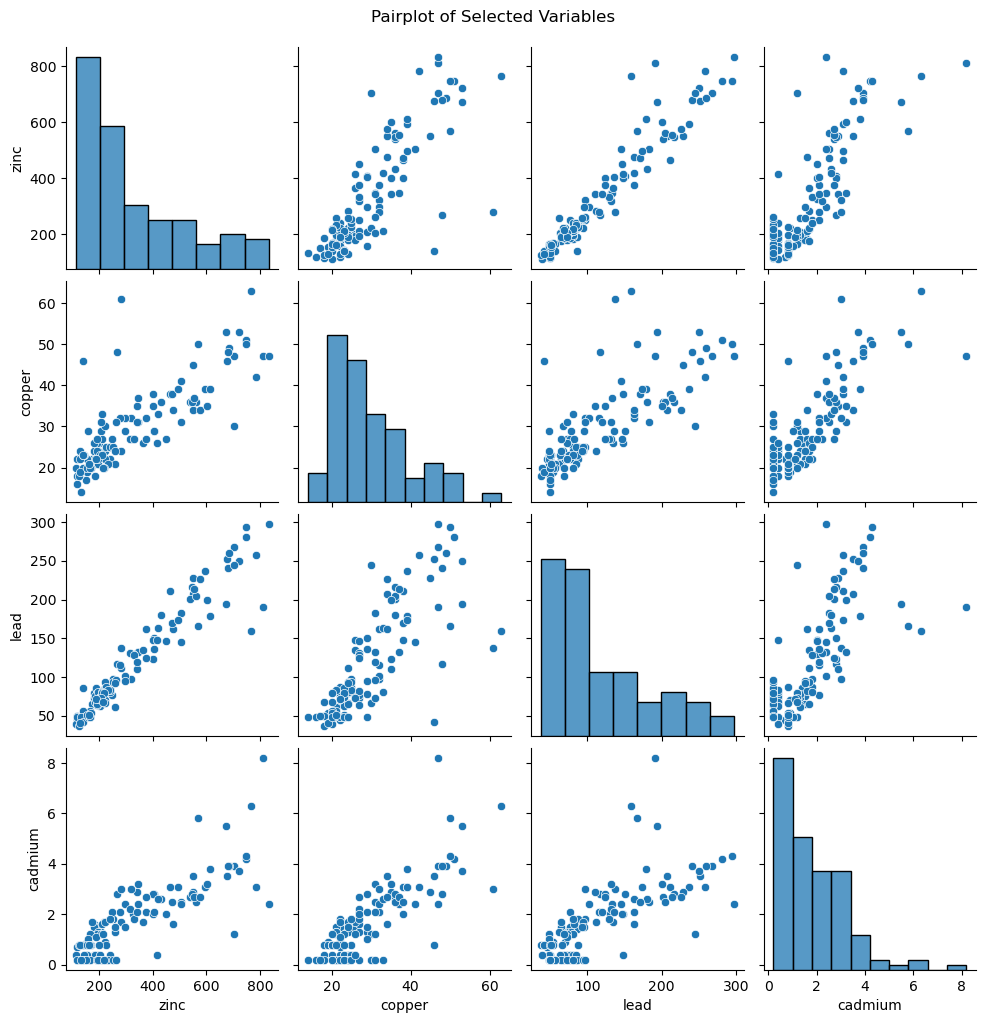

C:\Users\chloe\AppData\Local\Temp\ipykernel_35348\2054946925.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meuse_cleaned.corr()


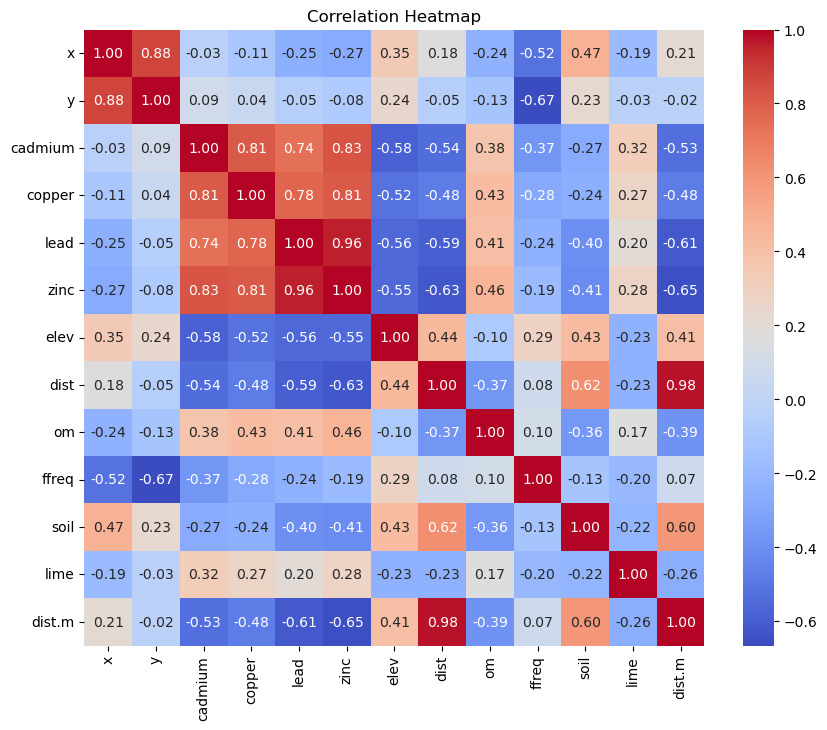

In [14]:
# Pairplot for the metal elements
selected_vars = ['zinc', 'copper', 'lead', 'cadmium']
sns.pairplot(meuse_cleaned[selected_vars])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# Correlation heatmap 
correlation_matrix = meuse_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
meuse_cleaned.describe()

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,dist.m
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,121.000000,123.000000,123.000000,123.000000,123.000000
mean,179992.747967,331503.268293,1.765041,29.804878,116.585366,326.617886,8.442797,0.289066,6.247934,1.764228,1.560976,0.130081,347.479675
std,757.104943,1035.001426,1.426045,10.038988,67.314399,192.320878,0.964961,0.185895,2.210358,0.747469,0.667100,0.337769,209.568618
min,178605.000000,329714.000000,0.200000,14.000000,37.000000,113.000000,5.700000,0.001358,1.000000,1.000000,1.000000,0.000000,10.000000
25%,179297.000000,330607.000000,0.550000,22.000000,65.500000,186.500000,7.800500,0.130247,4.800000,1.000000,1.000000,0.000000,160.000000
50%,179991.000000,331423.000000,1.500000,27.000000,87.000000,241.000000,8.507000,0.266220,6.200000,2.000000,1.000000,0.000000,330.000000
75%,180629.500000,332330.000000,2.650000,35.000000,160.500000,441.500000,9.042000,0.391242,7.500000,2.000000,2.000000,0.000000,480.000000
max,181390.000000,333370.000000,8.200000,63.000000,297.000000,832.000000,10.520000,0.880389,12.800000,3.000000,3.000000,1.000000,1000.000000


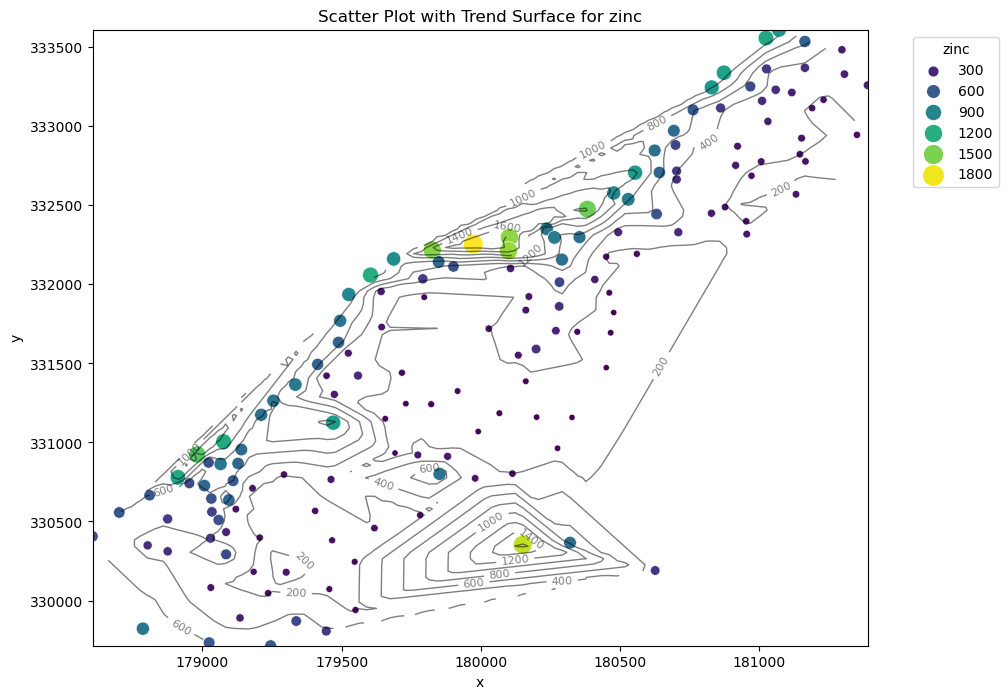

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata


# Select variables of interest
x_variable = 'x'  # Replace with the actual variable name
y_variable = 'y'  # Replace with the actual variable name
z_variable = 'zinc'  # Replace with the actual variable name

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_variable, y=y_variable, hue=z_variable, data=meuse_df, palette='viridis', size=z_variable, sizes=(20, 200))

# Add a trend surface using griddata
x_range = np.linspace(meuse_df[x_variable].min(), meuse_df[x_variable].max(), 100)
y_range = np.linspace(meuse_df[y_variable].min(), meuse_df[y_variable].max(), 100)
xx, yy = np.meshgrid(x_range, y_range)
points = np.array(meuse_df[[x_variable, y_variable]])
values = np.array(meuse_df[z_variable])
zz = griddata(points, values, (xx, yy), method='linear')

# Contour plot of the trend surface
contour = plt.contour(xx, yy, zz, levels=10, colors='black', linewidths=1, alpha=0.5)
plt.clabel(contour, inline=True, fontsize=8)

plt.title(f'Scatter Plot with Trend Surface for {z_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.legend(title=z_variable, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
pip install pysal==2.4.0 

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.explore.esda.moran import Moran
from pysal.lib.weights import KNN
from scipy.spatial.distance import pdist, squareform



# Select variable of interest
z_variable = 'zinc'  # Replace with the actual variable name

# Create a GeoDataFrame with Point geometries
geometry = [Point(xy) for xy in zip(meuse_df['x'], meuse_df['y'])]
meuse_gdf = gpd.GeoDataFrame(meuse_df, geometry=geometry, crs='EPSG:4326')

# Ensure the GeoDataFrame is using the correct geometry column
meuse_gdf = meuse_gdf.set_geometry('geometry')

# Create a spatial weights matrix (K-nearest neighbors)
knn_weights = KNN.from_dataframe(meuse_gdf, k=4)

# Calculate pairwise distances for variogram
coords = meuse_gdf[['x', 'y']].values
distances = squareform(pdist(coords))

# Calculate the variogram
lags, gammas, _, _, _ = Moran(meuse_gdf[z_variable].values, knn_weights).variogram(distances)

# Plot the variogram
plt.figure(figsize=(10, 6))
plt.plot(lags, gammas, marker='o', linestyle='-', color='b')
plt.title(f'Variogram for {z_variable}')
plt.xlabel('Distance')
plt.ylabel('Moran\'s I')
plt.grid(True)
plt.show()

ImportError: cannot import name 'Local_Spatial_Pearson' from 'esda.lee' (C:\Users\chloe\anaconda3\Lib\site-packages\esda\lee.py)

### Using original uncleaned dataset

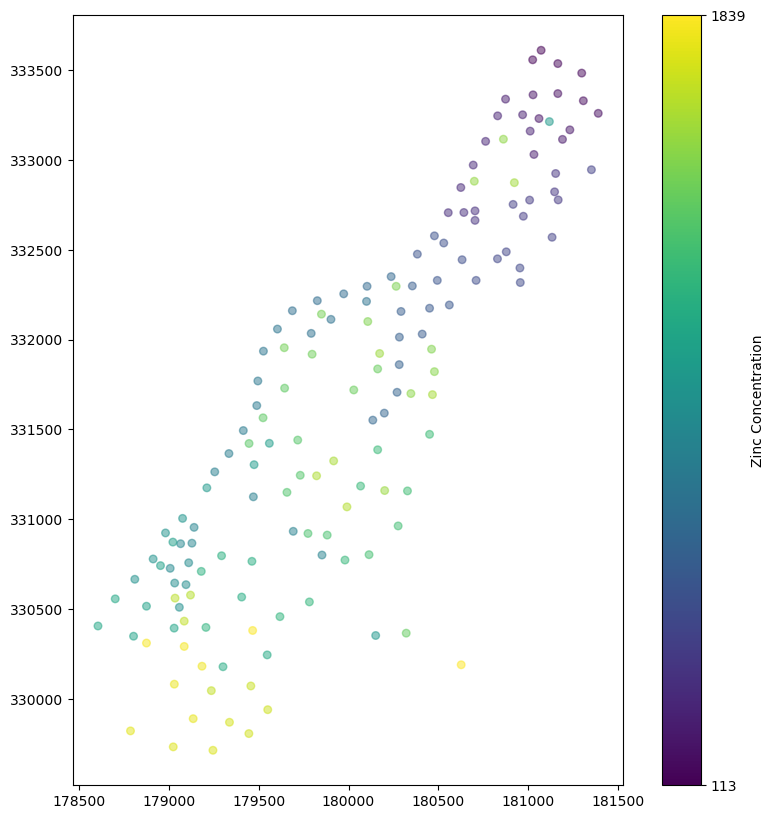

In [13]:
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as colors

zinc_values = meuse_df['zinc']

# Create a GeoDataFrame from the 'meuse' DataFrame
geometry = [Point(xy) for xy in zip(meuse_df['x'], meuse_df['y'])]
geo_df = gpd.GeoDataFrame(meuse_df, geometry=geometry)

# Plot the spatial distribution of zinc concentrations with colors based on zinc values
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = geo_df.plot(ax=ax, marker='o', c=zinc_values, cmap='viridis', markersize=30, alpha=0.5, legend=True)

# Create a ScalarMappable to map zinc values to colors
norm = colors.Normalize(vmin=zinc_values.min(), vmax=zinc_values.max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add colorbar for zinc concentrations using ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Zinc Concentration')

# Set ticks on the colorbar
cbar.set_ticks([zinc_values.min(), zinc_values.max()])

# Display the plot
plt.show()

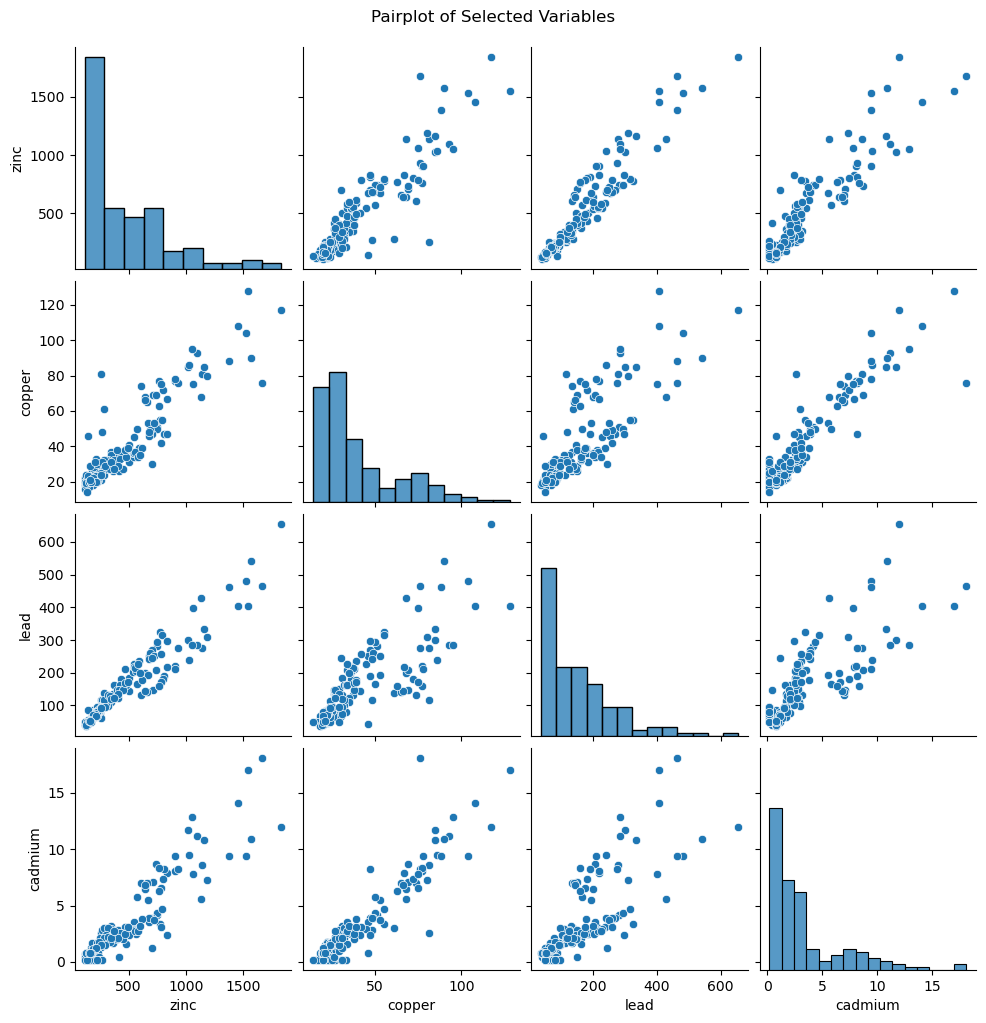

C:\Users\chloe\AppData\Local\Temp\ipykernel_29620\3512001613.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meuse_df.corr()


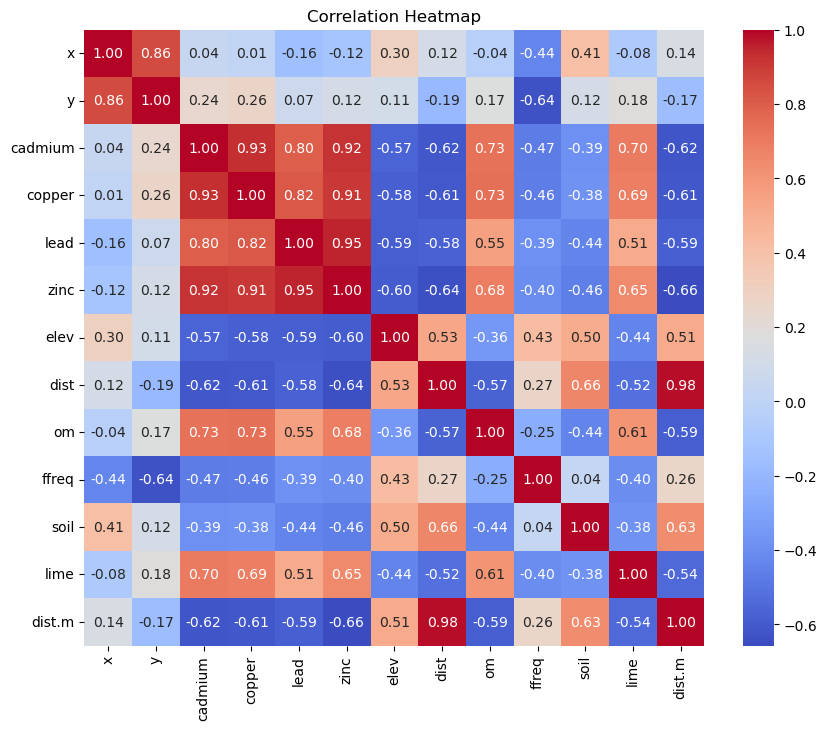

In [69]:
# Pairplot for the metal elements
selected_vars = ['zinc', 'copper', 'lead', 'cadmium']
sns.pairplot(meuse_df[selected_vars])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# Correlation heatmap 
correlation_matrix = meuse_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [68]:
meuse_df.describe()

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,dist.m
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,153.000000,155.000000,155.000000,155.000000,155.000000
mean,180004.600000,331634.935484,3.245806,40.316129,153.361290,469.716129,8.165394,0.240017,7.478431,1.606452,1.451613,0.283871,290.322581
std,746.039775,1047.746801,3.523746,23.680436,111.320054,367.073788,1.058657,0.197702,3.432966,0.734111,0.636483,0.452336,226.799927
min,178605.000000,329714.000000,0.200000,14.000000,37.000000,113.000000,5.180000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000
25%,179371.000000,330762.000000,0.800000,23.000000,72.500000,198.000000,7.546000,0.075687,5.300000,1.000000,1.000000,0.000000,80.000000
50%,179991.000000,331633.000000,2.100000,31.000000,123.000000,326.000000,8.180000,0.211843,6.900000,1.000000,1.000000,0.000000,270.000000
75%,180629.500000,332463.000000,3.850000,49.500000,207.000000,674.500000,8.955000,0.364067,9.000000,2.000000,2.000000,1.000000,450.000000
max,181390.000000,333611.000000,18.100000,128.000000,654.000000,1839.000000,10.520000,0.880389,17.000000,3.000000,3.000000,1.000000,1000.000000


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Scatter plot with color bar
scatter_plot = plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for metal concentrations
cbar = plt.colorbar(scatter_plot, label='Zinc Concentration')

# Set labels and legend
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()

# Display the plot
plt.show()

In [ ]:
outliers, cleaned = remove_outlier(meuse_df,'zinc')
scatter_plot = plt.scatter(cleaned['x'], cleaned['y'], c=cleaned['zinc'], cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for metal concentrations
cbar = plt.colorbar(scatter_plot, label='Zinc Concentration')

# Set labels and legend
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Scatter plot with color bar
scatter_plot = plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)
plt.scatter(meuse_df.loc[outliers, 'x'], meuse_df.loc[outliers, 'y'], marker='x', c='red', label='Outliers')
# Add color bar for metal concentrations
cbar = plt.colorbar(scatter_plot, label='Zinc Concentration')

# Set labels and legend
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()

# Display the plot
plt.show()